# Analiziranje podatkov glede na višino

Naložimo ustrezne pakete

In [509]:
# naložimo pakete
import os
import pandas as pd

nov_directory = 'obdelani podatki'
csv_drzave = 'drzave.csv'
csv_kontinenti = 'kontinenti.csv'
# izberemo interaktivni 'notebook' stil risanja
%matplotlib inline

pd.set_option('display.max_rows', 15)
path1 = os.path.join(nov_directory, csv_drzave) 
path2 = os.path.join(nov_directory, csv_kontinenti) 

#naložimo razpredelnico, s katero bomo delali
countries = pd.read_csv(path1)
continents = pd.read_csv(path2)

In [510]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

## 1. Splošno

### 1.1. Države

V spodnjih tabelah je prikazan seznam vseh držav, ki sem jih zajela v svoji projektni nalogi. Vsebuje podatke o višini, teži in ITM-ju tako moških kot žensk. V tej datoteki sem se osredotočila na analiziranje podatkov višine.

In [511]:
countries.index += 1
countries

,ime države,višina moških,teža moških,ITM moških,višina žensk,teža žensk,ITM žensk
1,Netherlands,1.84,87.9,26.1,1.70,73.2,25.3
2,Montenegro,1.83,90.4,27.0,1.70,75.3,26.2
3,Estonia,1.82,89.9,27.0,1.68,73.7,26.0
4,Denmark,1.82,86.8,26.3,1.69,70.2,24.6
5,Bosnia and Herzegovina,1.82,87.1,26.4,1.67,70.6,25.3
...,...,...,...,...,...,...,...
123,Nepal,1.64,60.5,22.5,1.52,51.6,22.3
124,Guatemala,1.64,69.1,25.7,1.51,61.9,27.3
125,Yemen,1.63,62.5,23.6,1.54,56.9,24.0
126,Laos,1.62,59.5,22.6,1.53,53.7,23.0


In [512]:
countries.head(15)

,ime države,višina moških,teža moških,ITM moških,višina žensk,teža žensk,ITM žensk
1,Netherlands,1.84,87.9,26.1,1.70,73.2,25.3
2,Montenegro,1.83,90.4,27.0,1.70,75.3,26.2
3,Estonia,1.82,89.9,27.0,1.68,73.7,26.0
4,Denmark,1.82,86.8,26.3,1.69,70.2,24.6
5,Bosnia and Herzegovina,1.82,87.1,26.4,1.67,70.6,25.3
6,Iceland,1.81,89.2,27.1,1.68,72.6,25.6
7,Czechia,1.81,91.9,28.1,1.68,74.2,26.4
8,Slovenia,1.81,87.0,26.6,1.67,74.2,26.6
9,Slovakia,1.81,89.5,27.4,1.67,71.3,25.6
10,Croatia,1.81,91.3,28.0,1.67,74.7,26.9


In [513]:
countries.tail(15)

,ime države,višina moških,teža moških,ITM moških,višina žensk,teža žensk,ITM žensk
113,Burundi,1.67,60.5,21.8,1.55,51.5,21.5
114,Pakistan,1.67,64.7,23.3,1.54,58.9,24.7
115,Brunei,1.66,74.7,27.1,1.55,65.0,27.2
116,Myanmar,1.66,61.1,22.2,1.54,54.7,23.0
117,India,1.66,59.6,21.7,1.55,52.5,21.9
118,Indonesia,1.66,61.4,22.4,1.54,56.2,23.7
119,Cambodia,1.65,59.7,22.0,1.54,52.8,22.2
120,Madagascar,1.65,58.4,21.5,1.53,49.2,21.1
121,Philippines,1.65,61.8,22.8,1.54,55.5,23.5
122,Bangladesh,1.65,57.7,21.3,1.52,50.5,21.8


In [514]:
countries.describe() #quick overview

,višina moških,teža moških,ITM moških,višina žensk,teža žensk,ITM žensk
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,1.736772,78.850394,26.035433,1.612598,68.846457,26.392913
std,0.052793,11.245527,2.689767,0.045812,9.790713,2.984728
min,1.590000,53.900000,20.100000,1.510000,49.000000,21.000000
25%,1.700000,70.500000,24.250000,1.580000,62.150000,24.400000
50%,1.740000,81.100000,26.600000,1.610000,70.200000,26.300000
75%,1.780000,87.450000,27.550000,1.650000,73.900000,27.750000
max,1.840000,103.700000,33.100000,1.700000,98.100000,35.200000


V naslednji funkciji lahko vidimo, da stolpec 'ime države' porabi največ prostora.

In [515]:
countries.memory_usage(deep=True)
# ta funkcija nam pove, koliko prostora smo zasedli s posameznim stoplcem 
# to je lahko zelo koristno, če imamo malo prostora - da vemo, kje naj naredimo spremembno

Index             132
ime države       8254
višina moških    1016
teža moških      1016
ITM moških       1016
višina žensk     1016
teža žensk       1016
ITM žensk        1016
dtype: int64

Nadaljnje tabele prikazujejo države urejene po višini. Vidimo lahko, da so izmed vseh držav najvišji moški na Nizozemskem in enako velja za ženske. Najnižji moški se po podatkih nahajajo v Vzhodnem Timorju, ženske pa v Gvatemali.        

In [516]:
countries.sort_values(by='višina moških', ascending = False, inplace = True)
print(countries.head(5))
countries['višina moških']

               ime države  višina moških  teža moških  ITM moških  \
1             Netherlands           1.84         87.9        26.1   
2              Montenegro           1.83         90.4        27.0   
3                 Estonia           1.82         89.9        27.0   
5  Bosnia and Herzegovina           1.82         87.1        26.4   
4                 Denmark           1.82         86.8        26.3   

   višina žensk  teža žensk  ITM žensk  
1          1.70        73.2       25.3  
2          1.70        75.3       26.2  
3          1.68        73.7       26.0  
5          1.67        70.6       25.3  
4          1.69        70.2       24.6  


1      1.84
2      1.83
3      1.82
5      1.82
4      1.82
       ... 
123    1.64
124    1.64
125    1.63
126    1.62
127    1.59
Name: višina moških, Length: 127, dtype: float64

In [517]:
countries.sort_values(by='višina žensk', ascending = False, inplace = True)
print(countries.head(5))
countries['višina žensk']

    ime države  višina moških  teža moških  ITM moških  višina žensk  \
1  Netherlands           1.84         87.9        26.1          1.70   
2   Montenegro           1.83         90.4        27.0          1.70   
4      Denmark           1.82         86.8        26.3          1.69   
3      Estonia           1.82         89.9        27.0          1.68   
6      Iceland           1.81         89.2        27.1          1.68   

   teža žensk  ITM žensk  
1        73.2       25.3  
2        75.3       26.2  
4        70.2       24.6  
3        73.7       26.0  
6        72.6       25.6  


1      1.70
2      1.70
4      1.69
3      1.68
6      1.68
       ... 
126    1.53
122    1.52
123    1.52
127    1.52
124    1.51
Name: višina žensk, Length: 127, dtype: float64

In [518]:
countries.sort_values(by='višina moških', ascending = True, inplace = True)
print(countries.head(5))
countries['višina moških']

     ime države  višina moških  teža moških  ITM moških  višina žensk  \
127  East Timor           1.59         53.9        21.2          1.52   
126        Laos           1.62         59.5        22.6          1.53   
125       Yemen           1.63         62.5        23.6          1.54   
124   Guatemala           1.64         69.1        25.7          1.51   
123       Nepal           1.64         60.5        22.5          1.52   

     teža žensk  ITM žensk  
127        49.0       21.2  
126        53.7       23.0  
125        56.9       24.0  
124        61.9       27.3  
123        51.6       22.3  


127    1.59
126    1.62
125    1.63
124    1.64
123    1.64
       ... 
5      1.82
3      1.82
4      1.82
2      1.83
1      1.84
Name: višina moških, Length: 127, dtype: float64

In [519]:
countries.sort_values(by='višina žensk', ascending = True, inplace = True)
print(countries.head(5))
countries['višina žensk']

     ime države  višina moških  teža moških  ITM moških  višina žensk  \
124   Guatemala           1.64         69.1        25.7          1.51   
127  East Timor           1.59         53.9        21.2          1.52   
123       Nepal           1.64         60.5        22.5          1.52   
122  Bangladesh           1.65         57.7        21.3          1.52   
126        Laos           1.62         59.5        22.6          1.53   

     teža žensk  ITM žensk  
124        61.9       27.3  
127        49.0       21.2  
123        51.6       22.3  
122        50.5       21.8  
126        53.7       23.0  


124    1.51
127    1.52
123    1.52
122    1.52
126    1.53
       ... 
11     1.68
7      1.68
4      1.69
2      1.70
1      1.70
Name: višina žensk, Length: 127, dtype: float64

### 1.2. Kontinenti

Analogno kot pri državah je v spodnjih tabelah prikazan seznam delov kontinentov, ki sem jih zajela v svoji projektni nalogi. Vsebuje podatke o višini in teži tako moških kot žensk. V tej datoteki sem se osredotočila na analiziranje podatkov višine.

In [520]:
continents.index += 1
continents

,del kontinenta,višina moških,teža moških,višina žensk,teža žensk
1,Northern Africa,1.73,77.9,1.61,73.7
2,Eastern Africa,1.67,60.1,1.57,56.2
3,Western Africa,1.70,64.9,1.59,60.1
4,Southern Africa,1.69,71.2,1.59,73.2
5,Central Africa,1.69,62.6,1.58,58.0
...,...,...,...,...,...
18,Northern Europe,1.79,87.1,1.65,72.3
19,Eastern Europe,1.78,83.8,1.65,72.2
20,Polynesia,1.76,93.8,1.65,87.3
21,Melanesia,1.64,68.1,1.57,64.6


In [521]:
continents.head(5)

,del kontinenta,višina moških,teža moških,višina žensk,teža žensk
1,Northern Africa,1.73,77.9,1.61,73.7
2,Eastern Africa,1.67,60.1,1.57,56.2
3,Western Africa,1.70,64.9,1.59,60.1
4,Southern Africa,1.69,71.2,1.59,73.2
5,Central Africa,1.69,62.6,1.58,58.0


In [522]:
continents.tail(5)

,del kontinenta,višina moških,teža moških,višina žensk,teža žensk
18,Northern Europe,1.79,87.1,1.65,72.3
19,Eastern Europe,1.78,83.8,1.65,72.2
20,Polynesia,1.76,93.8,1.65,87.3
21,Melanesia,1.64,68.1,1.57,64.6
22,Micronesia,1.69,82.7,1.59,78.9


In [523]:
continents.describe()

,višina moških,teža moških,višina žensk,teža žensk
count,22.000000,22.000000,22.000000,22.000000
mean,1.721818,76.554545,1.603182,68.122727
std,0.045422,9.948952,0.035508,8.072583
min,1.640000,60.100000,1.540000,54.000000
25%,1.690000,68.875000,1.582500,62.350000
50%,1.725000,78.350000,1.600000,69.200000
75%,1.757500,83.650000,1.627500,72.900000
max,1.800000,93.800000,1.660000,87.300000


V naslednji funkciji lahko vidimo, da stolpec 'del kontinenta' porabi največ prostora. Kljub temu je očitna razlika med porabo prostora za države v primerjavi z deli kontinentov. Najmanjša poraba (če ne upoštevamo porabe indeksa) pri kontinentih nas 'stane' 176 bajtov, pri državah pa kar 1016 bajtov.

In [524]:
continents.memory_usage(deep=True)

Index              132
del kontinenta    1540
višina moških      176
teža moških        176
višina žensk       176
teža žensk         176
dtype: int64

Nadaljnje tabele prikazujejo dele kontinentov urejene po višini. Vidimo lahko, da so najvišji moški v zahodni Evropi in enako velja za ženske. Najnižji moški se po podatkih nahajajo v Melaneziji, ženske pa v južni Aziji.        

In [525]:
continents.sort_values(by='višina moških', ascending = False, inplace = True)
print(continents.head(5))
continents['višina moških']

           del kontinenta  višina moških  teža moških  višina žensk  \
16         Western Europe           1.80         86.1          1.66   
18        Northern Europe           1.79         87.1          1.65   
15  Australia/New Zealand           1.78         88.4          1.65   
19         Eastern Europe           1.78         83.8          1.65   
20              Polynesia           1.76         93.8          1.65   

    teža žensk  
16        69.2  
18        72.3  
15        73.1  
19        72.2  
20        87.3  


16    1.80
18    1.79
15    1.78
19    1.78
20    1.76
      ... 
9     1.68
14    1.67
2     1.67
12    1.66
21    1.64
Name: višina moških, Length: 22, dtype: float64

In [526]:
continents.sort_values(by='višina žensk', ascending = False, inplace = True)
print(continents.head(5))
continents['višina žensk']

           del kontinenta  višina moških  teža moških  višina žensk  \
16         Western Europe           1.80         86.1          1.66   
15  Australia/New Zealand           1.78         88.4          1.65   
19         Eastern Europe           1.78         83.8          1.65   
20              Polynesia           1.76         93.8          1.65   
18        Northern Europe           1.79         87.1          1.65   

    teža žensk  
16        69.2  
15        73.1  
19        72.2  
20        87.3  
18        72.3  


16    1.66
15    1.65
19    1.65
20    1.65
18    1.65
      ... 
2     1.57
21    1.57
14    1.55
12    1.55
9     1.54
Name: višina žensk, Length: 22, dtype: float64

In [527]:
continents.sort_values(by='višina moških', ascending = True, inplace = True)
print(continents.head(5))
continents['višina moških']

     del kontinenta  višina moških  teža moških  višina žensk  teža žensk
21        Melanesia           1.64         68.1          1.57        64.6
12       South Asia           1.66         60.9          1.55        54.0
14   Southeast Asia           1.67         62.8          1.55        56.7
2    Eastern Africa           1.67         60.1          1.57        56.2
9   Central America           1.68         74.0          1.54        66.1


21    1.64
12    1.66
14    1.67
2     1.67
9     1.68
      ... 
20    1.76
19    1.78
15    1.78
18    1.79
16    1.80
Name: višina moških, Length: 22, dtype: float64

In [528]:
continents.sort_values(by='višina žensk', ascending = True, inplace = True)
print(continents.head(5))
continents['višina žensk']

     del kontinenta  višina moških  teža moških  višina žensk  teža žensk
9   Central America           1.68         74.0          1.54        66.1
12       South Asia           1.66         60.9          1.55        54.0
14   Southeast Asia           1.67         62.8          1.55        56.7
21        Melanesia           1.64         68.1          1.57        64.6
2    Eastern Africa           1.67         60.1          1.57        56.2


9     1.54
12    1.55
14    1.55
21    1.57
2     1.57
      ... 
18    1.65
20    1.65
19    1.65
15    1.65
16    1.66
Name: višina žensk, Length: 22, dtype: float64

## 2. Grafi in razni izračuni

### 2.1. Države

#### 2.1.1. Primerjava prvih in zadnjih 10 držav

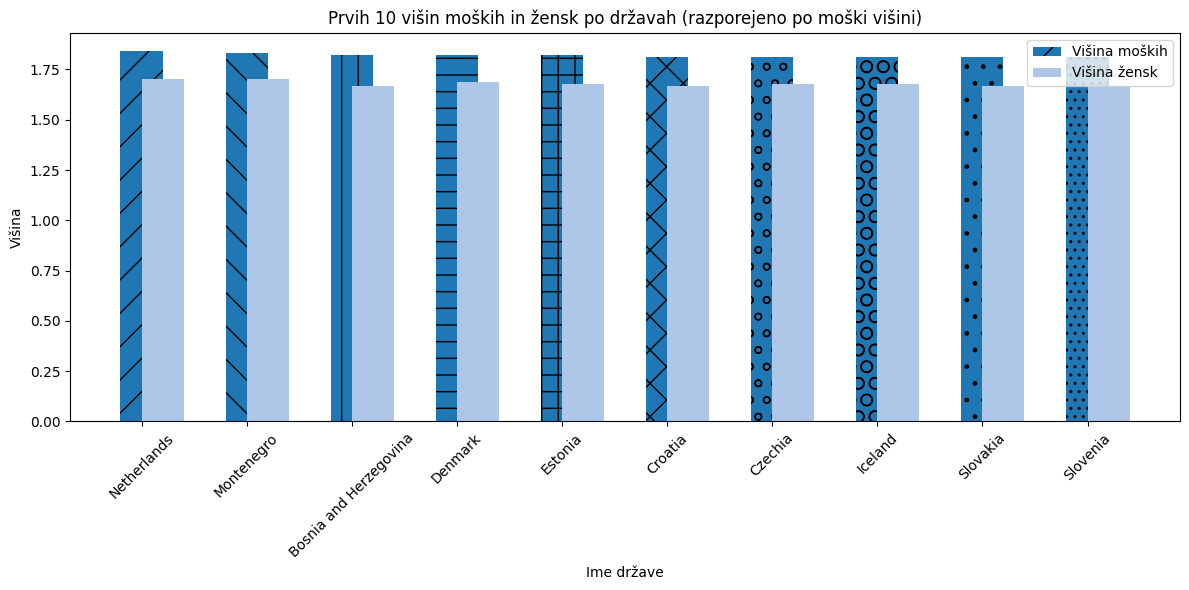

In [529]:
def plot_top_heights_sorted_by_male(data):
    top_10_male_heights = data.groupby('ime države')['višina moških'].mean().nlargest(10) 
    female_heights = data.groupby('ime države')['višina žensk'].mean()
    female_heights_sorted = female_heights[top_10_male_heights.index] # priredimo desetim največjim moškim višinam ustrezne ženske višine
    
    plt.figure(figsize=(12, 6))
    
    colors = plt.cm.tab20.colors  #get_cmap funkcija od plt.cm modula v Matplotlib  = to get a colormap
    male_bars = plt.bar(top_10_male_heights.index, top_10_male_heights, width=0.4, label='Višina moških', color=colors[0]) 
    female_bars = plt.bar(top_10_male_heights.index, female_heights_sorted, width=0.4, align='edge', label='Višina žensk', color=colors[1])  
    
    # dodamo vzorce
    patterns = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '..'] #malo prevec sem bila navdusena nad vzorci, priznam ...
    for bar, pattern in zip(male_bars, patterns): # zip da gremo skozi male_bars in patterns istočasno
        bar.set_hatch(pattern) # za različne vzorce
    
    plt.xlabel('Ime države')
    plt.ylabel('Višina')
    plt.title('Prvih 10 višin moških in žensk po državah (razporejeno po moški višini)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_top_heights_sorted_by_male(countries)

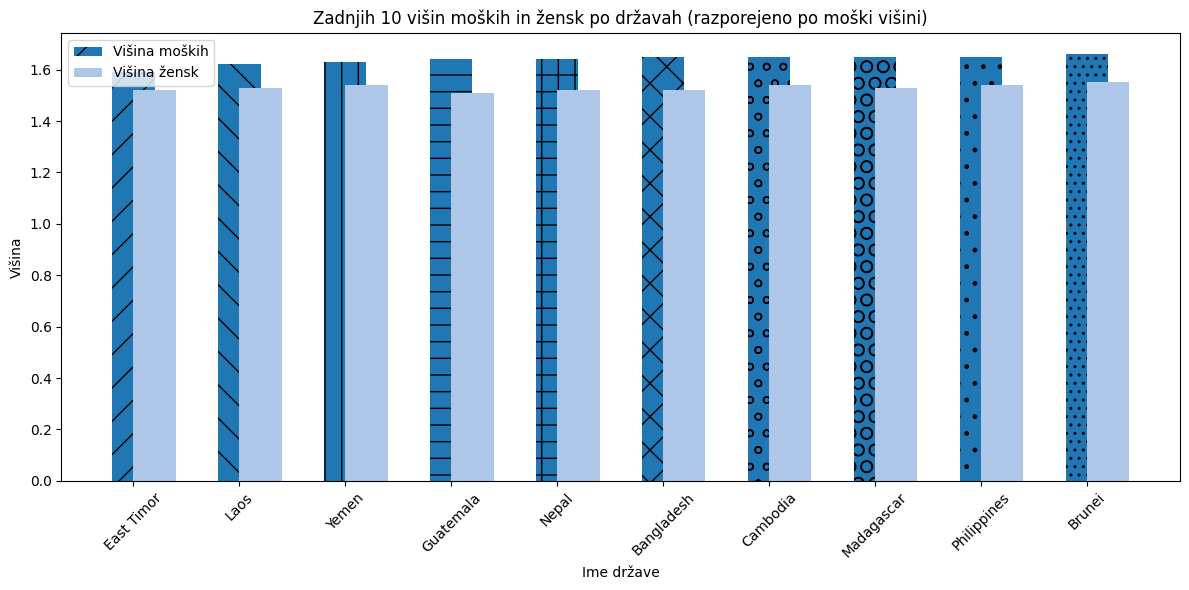

In [530]:
def plot_bottom_heights_sorted_by_male(data):
    bottom_10_male_heights = data.groupby('ime države')['višina moških'].mean().nsmallest(10)
    female_heights = data.groupby('ime države')['višina žensk'].mean()
    female_heights_sorted = female_heights[bottom_10_male_heights.index]
    
    plt.figure(figsize=(12, 6))
    
    colors = plt.cm.tab20.colors 
    male_bars = plt.bar(bottom_10_male_heights.index, bottom_10_male_heights, width=0.4, label='Višina moških', color=colors[0])
    female_bars = plt.bar(bottom_10_male_heights.index, female_heights_sorted, width=0.4, align='edge', label='Višina žensk', color=colors[1])
    
    patterns = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '..']
    for bar, pattern in zip(male_bars, patterns):
        bar.set_hatch(pattern)
    
    plt.xlabel('Ime države')
    plt.ylabel('Višina')
    plt.title('Zadnjih 10 višin moških in žensk po državah (razporejeno po moški višini)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_bottom_heights_sorted_by_male(countries)

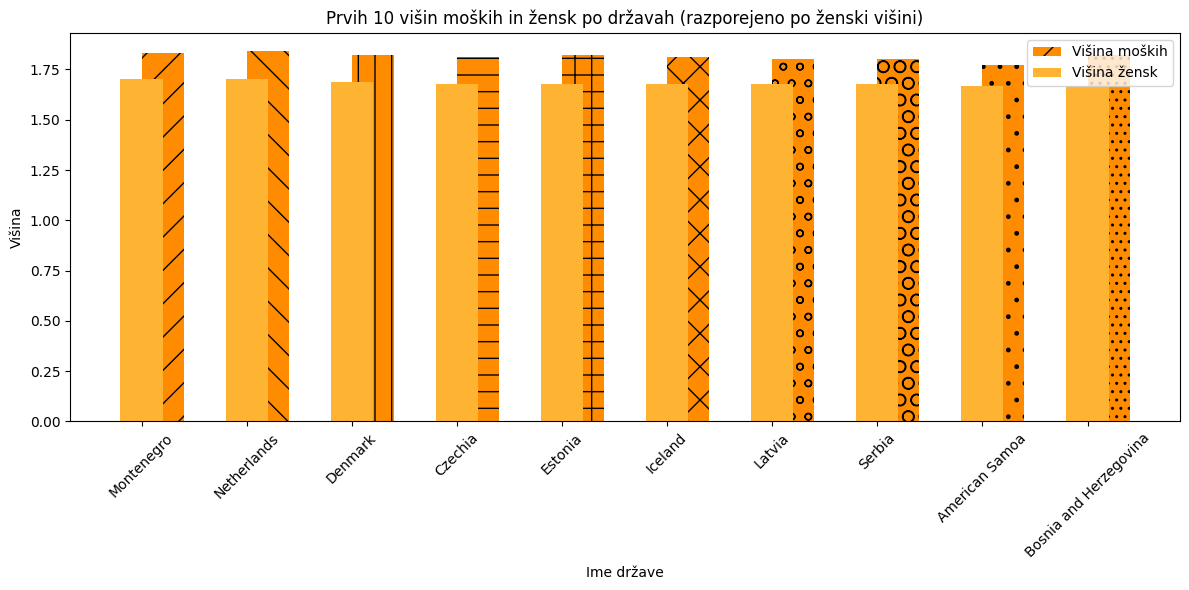

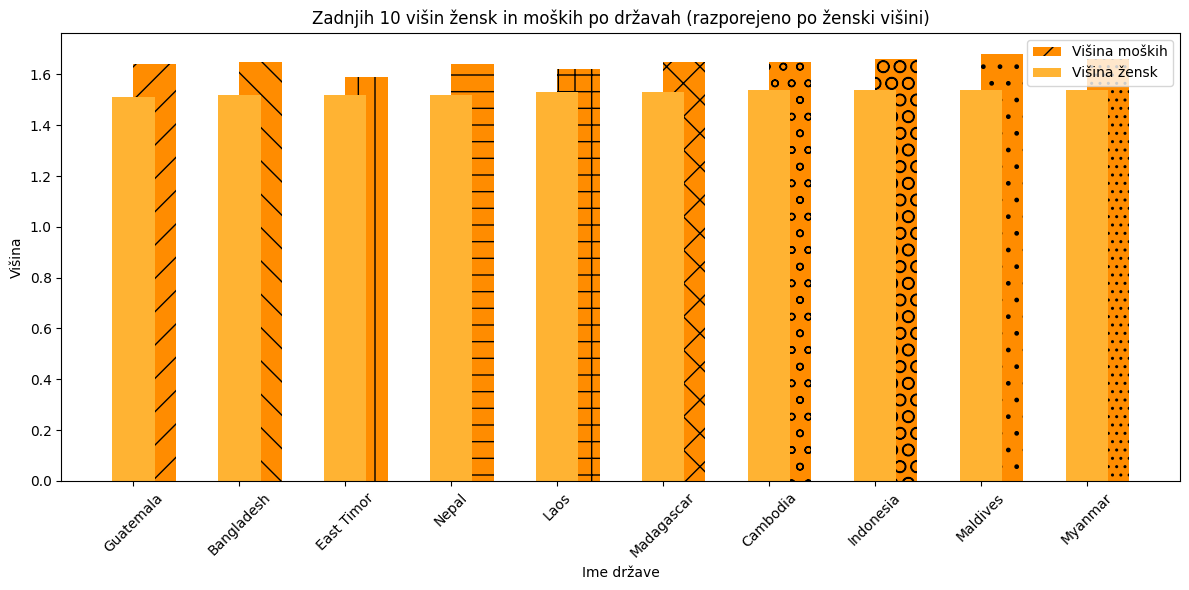

In [531]:
# moramo definirat barve, da imamo lahko dva različna grafa
dark_orange = (1.0, 0.55, 0.0)  # dark orange
light_orange = (1.0, 0.7, 0.2)  # light orange

def plot_top_heights_sorted_by_female(data):
    top_10_female_heights = data.groupby('ime države')['višina žensk'].mean().nlargest(10)
    male_heights = data.groupby('ime države')['višina moških'].mean()
    male_heights_sorted = male_heights[top_10_female_heights.index]
    
    plt.figure(figsize=(12, 6))
    
    male_bars = plt.bar(top_10_female_heights.index, male_heights_sorted, width=0.4, align='edge', label='Višina moških', color=dark_orange)
    female_bars = plt.bar(top_10_female_heights.index, top_10_female_heights, width=0.4, label='Višina žensk', color=light_orange)
    
    patterns = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.','..']
    for bar, pattern in zip(male_bars, patterns):
        bar.set_hatch(pattern)
    
    plt.xlabel('Ime države')
    plt.ylabel('Višina')
    plt.title('Prvih 10 višin moških in žensk po državah (razporejeno po ženski višini)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_bottom_heights_sorted_by_female(data):
    bottom_10_female_heights = data.groupby('ime države')['višina žensk'].mean().nsmallest(10)
    male_heights = data.groupby('ime države')['višina moških'].mean()
    male_heights_sorted = male_heights[bottom_10_female_heights.index]
    
    plt.figure(figsize=(12, 6))
    
    male_bars = plt.bar(bottom_10_female_heights.index, male_heights_sorted, width=0.4, align='edge', label='Višina moških', color=dark_orange)
    female_bars = plt.bar(bottom_10_female_heights.index, bottom_10_female_heights, width=0.4, label='Višina žensk', color=light_orange)
    
    patterns = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.','..']
    for bar, pattern in zip(male_bars, patterns):
        bar.set_hatch(pattern)
    
    plt.xlabel('Ime države')
    plt.ylabel('Višina')
    plt.title('Zadnjih 10 višin žensk in moških po državah (razporejeno po ženski višini)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_top_heights_sorted_by_female(countries)
plot_bottom_heights_sorted_by_female(countries)

#### 2.1.2. Razlike višin med spoloma

Naslednji računi prikazujejo, kolikšna je povprečna višina moškega in ženske glede na obravnavane države, za koliko se ti dve vrednosti razlikujeta in za kolikšen delež so povprečno moški višji od žensk ter kje se pojavi največja razlika med spoloma in kolikšna je. Opazimo, da so moški povprečno visoki 1.74 m, ženske 1.61 m, da so moški v primerjavi z ženskami za 13 cm višji in da so moški po državah povprečno 8.07 % višji od žensk. Največja razlika med višino moških in žensk je se je izkazala v državi Puerto Rico in znaša 0.16 m.



In [532]:
columns_to_keep = ['ime države', 'višina moških', 'višina žensk']

columns_to_drop = [col for col in countries.columns if col not in columns_to_keep] #odstranimo stolpce, ki jih ne želimo

countries.drop(columns=columns_to_drop, inplace=True)

print(countries)

      ime države  višina moških  višina žensk
124    Guatemala           1.64          1.51
127   East Timor           1.59          1.52
123        Nepal           1.64          1.52
122   Bangladesh           1.65          1.52
126         Laos           1.62          1.53
..           ...            ...           ...
11        Serbia           1.80          1.68
7        Czechia           1.81          1.68
4        Denmark           1.82          1.69
2     Montenegro           1.83          1.70
1    Netherlands           1.84          1.70

[127 rows x 3 columns]


In [533]:
average_world_male_height = round(np.mean(countries['višina moških']), 2)
average_world_female_height = round(np.mean(countries['višina žensk']), 2)

print('Povprečna višina moškega glede na vse države je', average_world_male_height, 'm.')
print('Povprečna višina ženske glede na vse države je', average_world_female_height, 'm.')

Povprečna višina moškega glede na vse države je 1.74 m.
Povprečna višina ženske glede na vse države je 1.61 m.


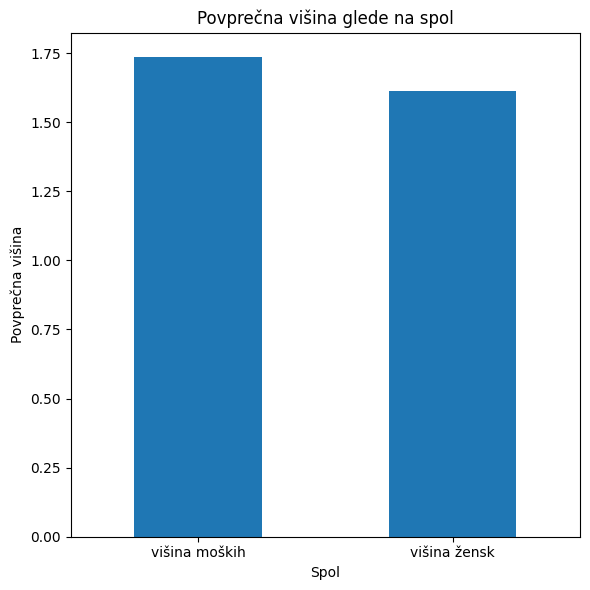

In [534]:
average_height = countries[['višina moških', 'višina žensk']].mean()

plt.figure(figsize=(6, 6))
average_height.plot(kind='bar')
plt.xlabel('Spol')
plt.ylabel('Povprečna višina')
plt.title('Povprečna višina glede na spol')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ostale grafe sem raje pustila brez vzorcev ... za vaše dobro :)

Koliko so moški večji od žensk?

In [535]:
rounded_height_difference = round(average_world_male_height - average_world_female_height, 2)

print('Razlika med višino moških in žensk je', rounded_height_difference, 'm.')

Razlika med višino moških in žensk je 0.13 m.


In [536]:
percentage_men_taller = (rounded_height_difference / average_world_female_height) * 100

print('Moški so po državah povprečno', round(percentage_men_taller, 2), '% višji od žensk.')

Moški so po državah povprečno 8.07 % višji od žensk.


Kolikšne so največje razlike med višinami in v katerih državah so?

In [537]:
countries['razlika višin'] = abs(countries['višina moških'] - countries['višina žensk'])
countries_ordered_by_height_difference = countries.sort_values(by='razlika višin', ascending=False)

countries_and_height_differences = countries_ordered_by_height_difference[['ime države', 'razlika višin']]

print('Tabela držav z največjimi razlikami višin:')
print(countries_and_height_differences)

Tabela držav z največjimi razlikami višin:
                 ime države  razlika višin
24              Puerto Rico           0.16
32                  Lebanon           0.15
25              Switzerland           0.15
27                  Ireland           0.15
5    Bosnia and Herzegovina           0.15
..                      ...            ...
95                 Kiribati           0.09
87                     Chad           0.09
125                   Yemen           0.09
84                   Tuvalu           0.08
127              East Timor           0.07

[127 rows x 2 columns]


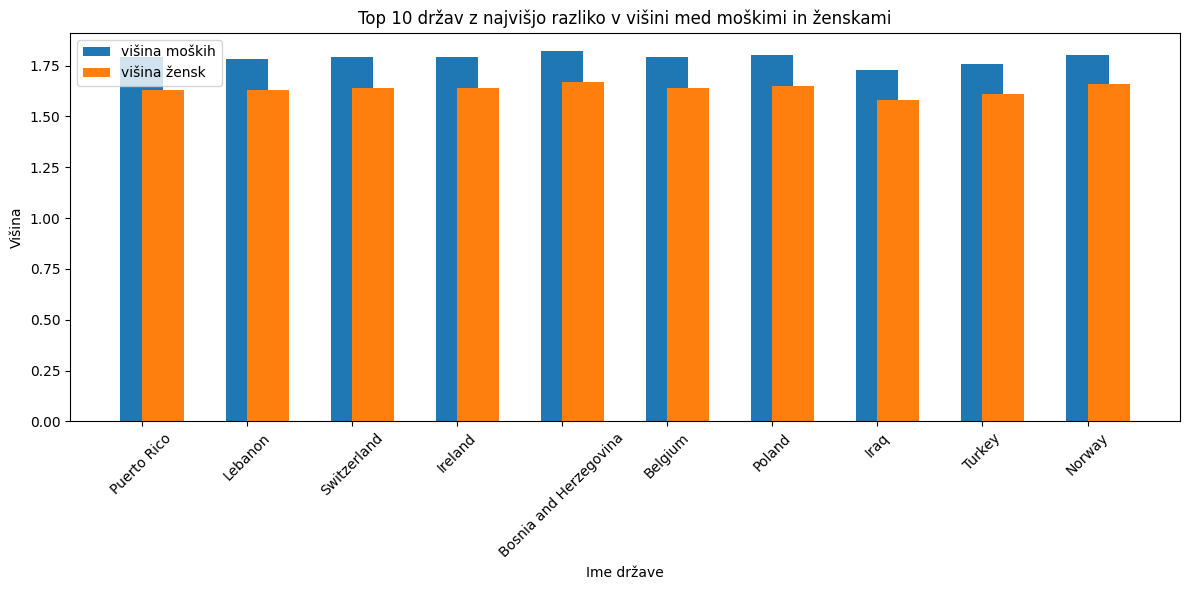

In [538]:
plt.figure(figsize=(12, 6))

plt.bar(countries_ordered_by_height_difference['ime države'].head(10), countries_ordered_by_height_difference['višina moških'].head(10), width=0.4, label='višina moških')
plt.bar(countries_ordered_by_height_difference['ime države'].head(10), countries_ordered_by_height_difference['višina žensk'].head(10), width=0.4, align='edge', label='višina žensk')

plt.xlabel('Ime države')
plt.ylabel('Višina')
plt.title('Top 10 držav z najvišjo razliko v višini med moškimi in ženskami')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

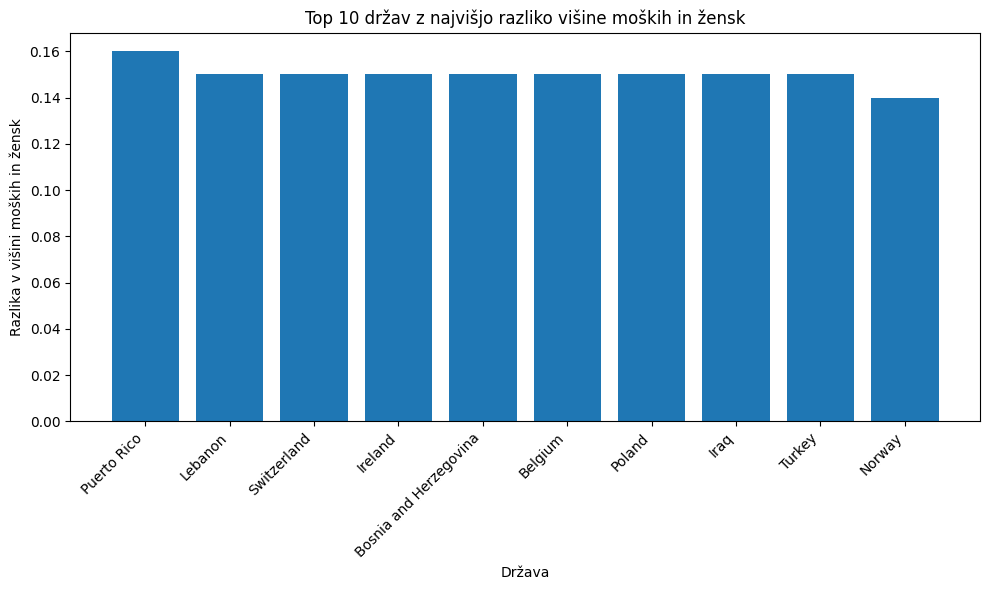

In [539]:
plt.figure(figsize=(10, 6))
plt.bar(countries_ordered_by_height_difference['ime države'].head(10), countries_ordered_by_height_difference['razlika višin'].head(10))
plt.xlabel('Država')
plt.ylabel('Razlika v višini moških in žensk')
plt.title('Top 10 držav z najvišjo razliko višine moških in žensk')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [540]:
max_height_difference = round(np.max(np.abs(countries['višina moških'] - countries['višina žensk'])), 2)

#poiščemo vrstico
max_height_row = countries.loc[np.abs(countries['višina moških'] - countries['višina žensk']).idxmax()]

# poiščemo državo
country_with_max_height_difference = max_height_row['ime države']

print('Največja razlika med višino moških in žensk je', max_height_difference, 'm.')
print('Ta razlika je prisotna na območju:', country_with_max_height_difference)

Največja razlika med višino moških in žensk je 0.16 m.
Ta razlika je prisotna na območju: Puerto Rico


### 2.2. Kontinenti

#### 2.2.1. Primerjava prvih in zadnjih 10 delov kontinentov

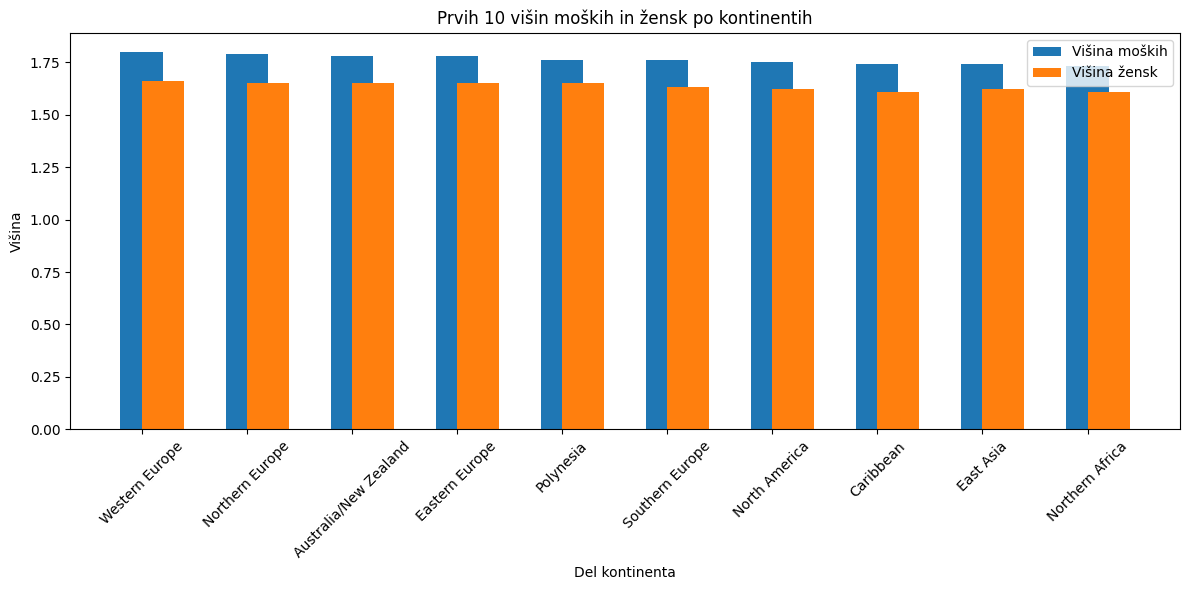

In [541]:
top_10_male_heights_continents = continents.groupby('del kontinenta')['višina moških'].mean().nlargest(10)
female_heights_continents = continents.groupby('del kontinenta')['višina žensk'].mean()

female_heights_sorted_continents = female_heights_continents[top_10_male_heights_continents.index] # priredimo desetim največjim moškim višinam ustrezne ženske višine

plt.figure(figsize=(12, 6))

plt.bar(top_10_male_heights_continents.index, top_10_male_heights_continents, width=0.4, label='Višina moških')
plt.bar(top_10_male_heights_continents.index, female_heights_sorted_continents, width=0.4, align='edge', label='Višina žensk')

plt.xlabel('Del kontinenta')
plt.ylabel('Višina')
plt.title('Prvih 10 višin moških in žensk po kontinentih')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

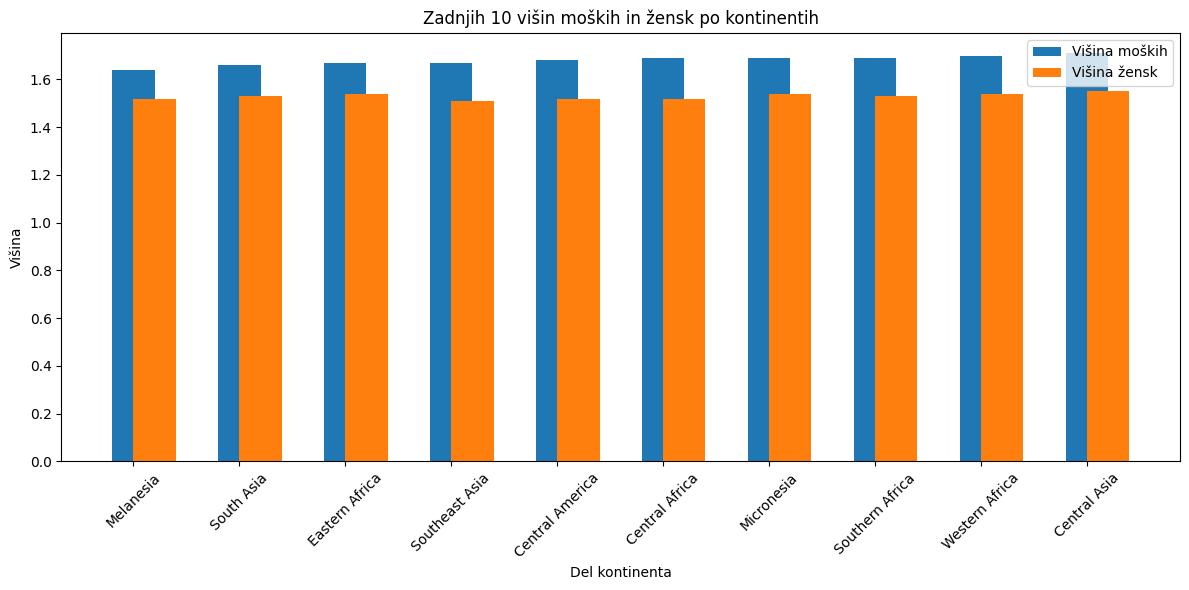

In [542]:
bottom_10_male_heights_continents = continents.groupby('del kontinenta')['višina moških'].mean().nsmallest(10)
female_heights_continents = continents.groupby('del kontinenta')['višina žensk'].mean()

female_heights_sorted_continents = female_heights[bottom_10_male_heights.index]

plt.figure(figsize=(12, 6))

plt.bar(bottom_10_male_heights_continents.index, bottom_10_male_heights_continents, width=0.4, label='Višina moških')
plt.bar(bottom_10_male_heights_continents.index, female_heights_sorted_continents, width=0.4, align='edge', label='Višina žensk')

plt.xlabel('Del kontinenta')
plt.ylabel('Višina')
plt.title('Zadnjih 10 višin moških in žensk po kontinentih')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### 2.2.2. Razlike višin med spoloma

Analogno kot pri državah sem naredila račune, kolikšna je povprečna višina moškega in ženske glede na dele kontinentov, za koliko se ti dve vrednosti razlikujeta in za kolikšen delež so povprečno moški višji od žensk ter kje se pojavi največja razlika med spoloma in kolikšna je. Opazimo, da so moški povprečno visoki 1.72 m, ženske 1.6 m, da so moški v primerjavi z ženskami za 12 cm višji in da so moški po državah povprečno 7.5 % višji od žensk. Največja razlika med višino moških in žensk je se je izkazala v severni Ameriki in v severni ter zahodni Evropi in znaša 0.14 m.



In [543]:
columns_to_keep = ['del kontinenta', 'višina moških', 'višina žensk']

columns_to_drop = [col for col in continents.columns if col not in columns_to_keep] #odstranimo stolpce, ki jih ne želimo

continents.drop(columns=columns_to_drop, inplace=True)

print(continents)

           del kontinenta  višina moških  višina žensk
9         Central America           1.68          1.54
12             South Asia           1.66          1.55
14         Southeast Asia           1.67          1.55
21              Melanesia           1.64          1.57
2          Eastern Africa           1.67          1.57
..                    ...            ...           ...
18        Northern Europe           1.79          1.65
20              Polynesia           1.76          1.65
19         Eastern Europe           1.78          1.65
15  Australia/New Zealand           1.78          1.65
16         Western Europe           1.80          1.66

[22 rows x 3 columns]


In [544]:
average_world_male_height_c = round(np.mean(continents['višina moških']), 2)
average_world_female_height_c = round(np.mean(continents['višina žensk']), 2)

print('Povprečna višina moškega glede na kontinente je', average_world_male_height_c, 'm.')
print('Povprečna višina ženske glede na kontinente je', average_world_female_height_c, 'm.')

Povprečna višina moškega glede na kontinente je 1.72 m.
Povprečna višina ženske glede na kontinente je 1.6 m.


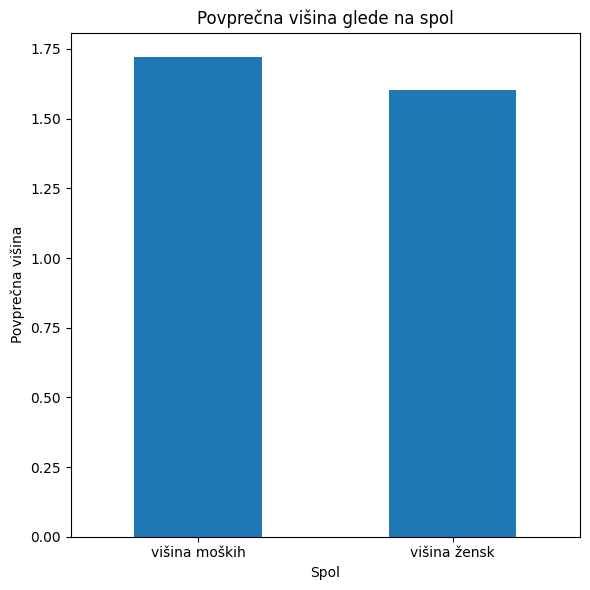

In [545]:
average_height = continents[['višina moških', 'višina žensk']].mean()

plt.figure(figsize=(6, 6))
average_height.plot(kind='bar')
plt.xlabel('Spol')
plt.ylabel('Povprečna višina')
plt.title('Povprečna višina glede na spol')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Koliko so moški večji od žensk?

In [546]:
rounded_height_difference_c = round(average_world_male_height_c - average_world_female_height_c, 2)

print('Razlika med višino moških in žensk je', rounded_height_difference_c, 'm.')

Razlika med višino moških in žensk je 0.12 m.


In [547]:
rounded_height_difference_c = (rounded_height_difference_c / average_world_female_height_c) * 100

print('Moški so po kontinentih povprečno', round(rounded_height_difference_c, 2), '% višji od žensk.')

Moški so po kontinentih povprečno 7.5 % višji od žensk.


Kolikšne so največje razlike med višinami in v katerih delih kontinentov so?

In [548]:
continents['razlika višin'] = abs(continents['višina moških'] - continents['višina žensk'])
continents_ordered_by_height_difference = continents.sort_values(by='razlika višin', ascending=False)

continents_and_height_differences = continents_ordered_by_height_difference[['del kontinenta', 'razlika višin']]

print('Tabela delov kontinentov z največjimi razlikami višin:')
print(continents_and_height_differences)

Tabela delov kontinentov z največjimi razlikami višin:
           del kontinenta  razlika višin
16         Western Europe           0.14
18        Northern Europe           0.14
9         Central America           0.14
15  Australia/New Zealand           0.13
19         Eastern Europe           0.13
..                    ...            ...
5          Central Africa           0.11
2          Eastern Africa           0.10
22             Micronesia           0.10
4         Southern Africa           0.10
21              Melanesia           0.07

[22 rows x 2 columns]


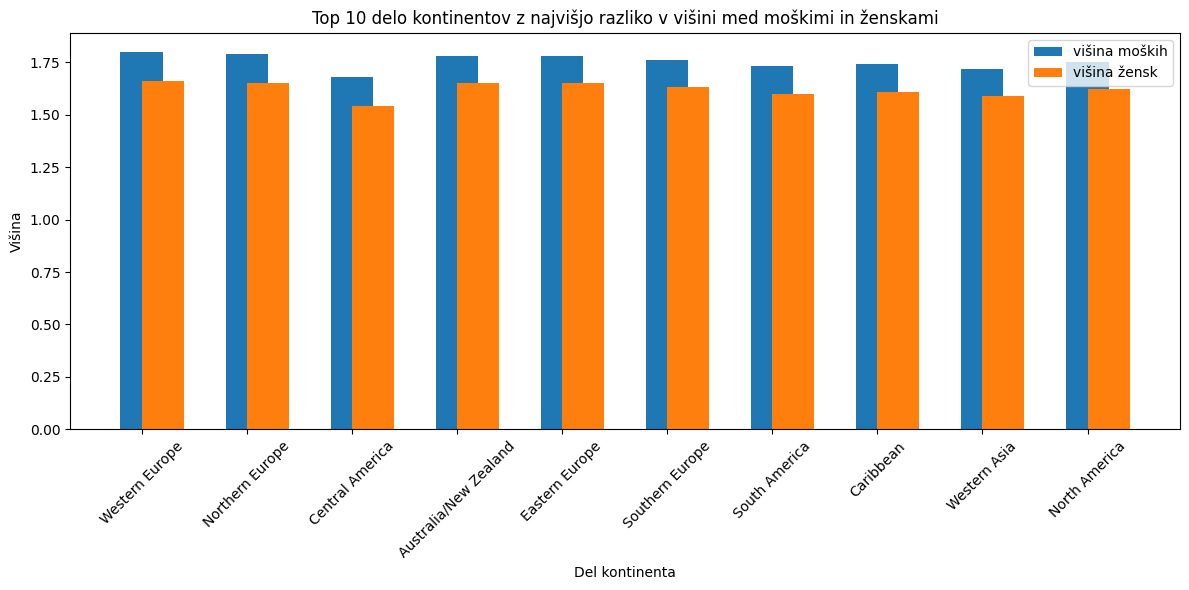

In [549]:
plt.figure(figsize=(12, 6))

plt.bar(continents_ordered_by_height_difference['del kontinenta'].head(10), continents_ordered_by_height_difference['višina moških'].head(10), width=0.4, label='višina moških')
plt.bar(continents_ordered_by_height_difference['del kontinenta'].head(10), continents_ordered_by_height_difference['višina žensk'].head(10), width=0.4, align='edge', label='višina žensk')

plt.xlabel('Del kontinenta')
plt.ylabel('Višina')
plt.title('Top 10 delo kontinentov z najvišjo razliko v višini med moškimi in ženskami')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

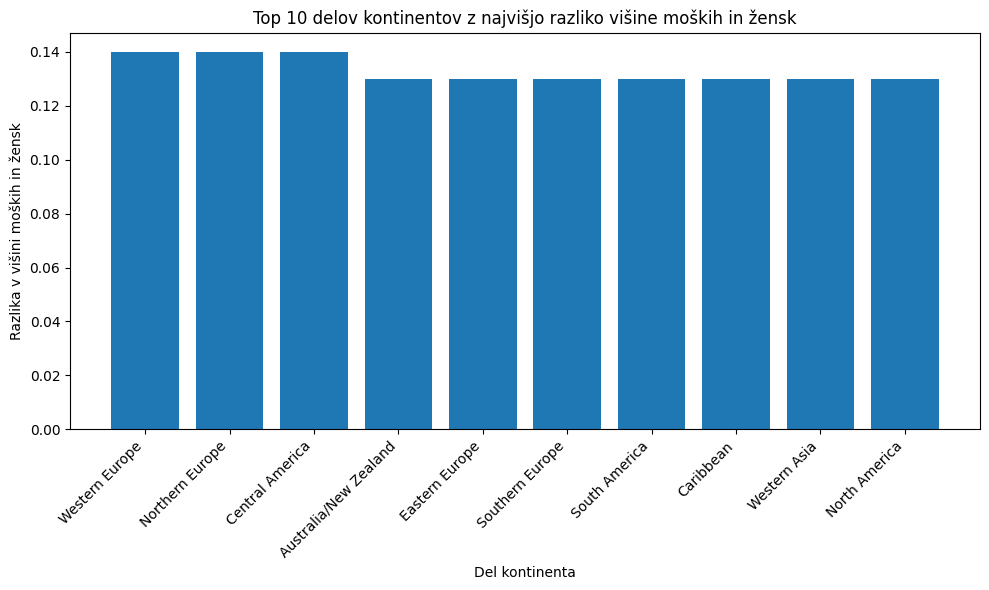

In [550]:
plt.figure(figsize=(10, 6))
plt.bar(continents_ordered_by_height_difference['del kontinenta'].head(10), continents_ordered_by_height_difference['razlika višin'].head(10))
plt.xlabel('Del kontinenta')
plt.ylabel('Razlika v višini moških in žensk')
plt.title('Top 10 delov kontinentov z najvišjo razliko višine moških in žensk')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Kje je največja razlika med moškimi in ženskami in kolikšna je?

In [551]:
def print_max_height_difference(continents):
    # najprej najdemo največjo razliko s funkcijo max
    max_height_difference = continents['razlika višin'].max()
    
    # pošičemo del kontinenta z največjo razliko
    max_height_rows = continents[continents['razlika višin'] == max_height_difference]
    continents_with_max_height_difference = ', '.join(max_height_rows['del kontinenta'])
    
    
    print(f'Največja razlika med višino moških in žensk je {max_height_difference:.2f} m.')
    print(f'Ta razlika je prisotna na območju: {continents_with_max_height_difference}')

print_max_height_difference(continents)

Največja razlika med višino moških in žensk je 0.14 m.
Ta razlika je prisotna na območju: Northern Europe, Western Europe
